#### 1.In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course. 

In [ ]:
#### When should ml be used?
ML is primarily for using data to make future predictions.
If you're only looking at historical trends in your data there's no need to build a machine learning model.
Also, chances are if you're analyzing historical data you'll want to know why certain events occurred and 
exactly how two pieces of data are related.
machine learning is used when there is more limited, structured data available. 
Most machine learning algorithms are designed to train models to tabular data (organized into independent rows and columns).

#when not
Solving less complex problems:- Machine learning, specifically deep learning algorithms, are useful for finding complex 
relationships and hidden patterns in data consisting of many interdependent variables. For less complicated problems,
if the rule-based system is giving performance comparable to a machine learning system, then it is advisable to avoid
the use of a machine learning system.  

Lack of labeled data and in-house expertise:- Most deep learning models require labeled data and an expert team to 
train the models and put them in production. It is advisable not to use deep learning algorithms to deliver projects
if you don’t have enough labeled data and a dedicated team. For example, let’s say that you are developing a model 
that detects illegal listings from the e-commerce company website. The operation team has determined some keywords 
to help find illegal listings. Due to the mentioned constraints, you might go with a rule-based approach using keywords 
to detect illegal listings, and later, as the second version of the model, you can implement an image classification 
system along with some text models to detect illegal listings once required resources are acquired. 

#### 2.Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques.  

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
from scipy import signal
import seaborn as sns

In [75]:
df = pd.read_csv('loans_full_schema.csv')
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-18,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-18,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-18,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-18,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-18,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-18,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-18,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-18,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-18,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [76]:
df.tail()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-18,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-18,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-18,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-18,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0
9999,operations analyst,3.0,CT,RENT,66000.0,Not Verified,20.82,NaN,NaN,NaN,...,B4,Feb-18,Current,whole,Cash,11574.83,1658.56,1225.17,433.39,0.0


In [77]:
print(df.dtypes)

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

In [78]:
#missing values
#A number of remaining columns have missing values.
df.isnull().sum()/df.shape[0]*100

emp_title                            8.33
emp_length                           8.17
state                                0.00
homeownership                        0.00
annual_income                        0.00
verified_income                      0.00
debt_to_income                       0.24
annual_income_joint                 85.05
verification_income_joint           85.45
debt_to_income_joint                85.05
delinq_2y                            0.00
months_since_last_delinq            56.58
earliest_credit_line                 0.00
inquiries_last_12m                   0.00
total_credit_lines                   0.00
open_credit_lines                    0.00
total_credit_limit                   0.00
total_credit_utilized                0.00
num_collections_last_12m             0.00
num_historical_failed_to_pay         0.00
months_since_90d_late               77.15
current_accounts_delinq              0.00
total_collection_amount_ever         0.00
current_installment_accounts      

In [79]:
#removing missing data from all columns
new_df = df.dropna(axis =1)
new_df

,state,homeownership,annual_income,verified_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,NJ,MORTGAGE,90000.0,Verified,0,2001,6,28,10,70795,...,C3,Mar-18,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,HI,RENT,40000.0,Not Verified,0,1996,1,30,14,28800,...,C1,Feb-18,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,WI,RENT,40000.0,Source Verified,0,2006,4,31,10,24193,...,D1,Feb-18,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,PA,RENT,30000.0,Not Verified,0,2007,0,4,4,25400,...,A3,Jan-18,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,CA,RENT,35000.0,Verified,0,2008,7,22,16,69839,...,C3,Mar-18,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TX,RENT,108000.0,Source Verified,0,2008,5,44,13,199195,...,A4,Jan-18,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,PA,MORTGAGE,121000.0,Verified,4,1994,1,28,15,382061,...,D3,Feb-18,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,CT,MORTGAGE,67000.0,Verified,2,2004,0,18,11,346402,...,E2,Feb-18,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,WI,MORTGAGE,80000.0,Source Verified,0,1999,1,38,15,294475,...,A1,Feb-18,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [80]:
df["initial_listing_status"].unique()

array(['whole', 'fractional'], dtype=object)

In [81]:
#In initial_listing_status column we replace 'whole' with 0 and 'fractional' with 1
def replace_initial_listing_status(val):
    if val == "whole":
        return 0
    else:
        return 1
df["initial_listing_status"] = df["initial_listing_status"].apply(replace_initial_listing_status, 0)
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-18,Current,0,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-18,Current,0,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-18,Current,1,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-18,Current,0,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-18,Current,0,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-18,Current,0,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-18,Current,0,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-18,Current,1,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-18,Current,0,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [82]:
df["initial_listing_status"].head()

0    0
1    0
2    1
3    0
4    0
Name: initial_listing_status, dtype: object

In [83]:
df["initial_listing_status"].tail()

9995    0
9996    0
9997    1
9998    0
9999    0
Name: initial_listing_status, dtype: object

In [84]:
df["disbursement_method"].unique()

array(['Cash', 'DirectPay'], dtype=object)

In [85]:
df["disbursement_method"] = df["disbursement_method"].map({"Cash":0,
                                                           "DirectPay":1}.get)

In [86]:
df["disbursement_method"].head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    0
Name: disbursement_method, dtype: int64

In [87]:
df["disbursement_method"].tail(15)

9985    0
9986    0
9987    0
9988    0
9989    0
9990    0
9991    0
9992    1
9993    0
9994    0
9995    0
9996    0
9997    0
9998    0
9999    0
Name: disbursement_method, dtype: int64

In [88]:
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-18,Current,0,0,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-18,Current,0,0,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-18,Current,1,0,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-18,Current,0,0,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-18,Current,0,0,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-18,Current,0,0,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-18,Current,0,0,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-18,Current,1,0,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-18,Current,0,0,21518.12,2873.31,2481.88,391.43,0.0


#### 3.Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

In [89]:
new_df.corr()

,annual_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
annual_income,1.000000,0.052236,-0.156001,0.090119,0.210163,0.176788,0.516703,0.406370,-0.008330,0.025976,...,-0.030568,0.324665,0.044843,-0.099584,0.315693,0.280170,0.162005,0.141893,0.174154,-0.005318
delinq_2y,0.052236,1.000000,-0.078109,0.003152,0.068040,0.013050,0.053373,0.001855,0.077680,-0.026574,...,-0.044865,-0.033258,-0.025936,0.090456,-0.013724,-0.031440,-0.004490,-0.006857,0.017165,-0.009404
earliest_credit_line,-0.156001,-0.078109,1.000000,0.042745,-0.294621,-0.174322,-0.231230,-0.140936,-0.000813,-0.031572,...,-0.040181,-0.117749,-0.032736,0.103635,-0.100001,-0.107508,-0.040281,-0.036125,-0.037027,0.020522
inquiries_last_12m,0.090119,0.003152,0.042745,1.000000,0.210433,0.186462,0.128325,0.120593,0.005236,0.045934,...,0.081222,0.034653,0.030506,0.131193,0.043704,0.026550,0.032823,0.023155,0.077204,0.022404
total_credit_lines,0.210163,0.068040,-0.294621,0.210433,1.000000,0.756209,0.385948,0.458980,-0.003843,-0.007679,...,-0.002579,0.179275,0.091341,-0.044435,0.157548,0.158414,0.082315,0.068932,0.112342,-0.030621
open_credit_lines,0.176788,0.013050,-0.174322,0.186462,0.756209,1.000000,0.326560,0.406047,-0.011692,0.017600,...,0.009116,0.154583,0.068368,-0.012773,0.143714,0.145993,0.049598,0.035624,0.112090,-0.025176
total_credit_limit,0.516703,0.053373,-0.231230,0.128325,0.385948,0.326560,1.000000,0.520876,-0.021652,-0.033266,...,-0.078146,0.303254,0.109235,-0.130497,0.264998,0.262783,0.143306,0.128016,0.135300,-0.014093
total_credit_utilized,0.406370,0.001855,-0.140936,0.120593,0.458980,0.406047,0.520876,1.000000,-0.017315,-0.021753,...,-0.058941,0.236893,0.085597,0.031527,0.228762,0.213776,0.101605,0.079426,0.181088,-0.016139
num_collections_last_12m,-0.008330,0.077680,-0.000813,0.005236,-0.003843,-0.011692,-0.021652,-0.017315,1.000000,-0.005815,...,-0.011918,-0.029474,-0.020317,0.029901,-0.020928,-0.031374,0.000295,0.002555,-0.016900,-0.007188
num_historical_failed_to_pay,0.025976,-0.026574,-0.031572,0.045934,-0.007679,0.017600,-0.033266,-0.021753,-0.005815,1.000000,...,0.504643,-0.013733,-0.006111,0.037563,-0.004522,-0.012227,-0.003260,-0.005528,0.016559,0.001453


In [90]:
new_df.columns

Index(['state', 'homeownership', 'annual_income', 'verified_income',
       'delinq_2y', 'earliest_credit_line', 'inquiries_last_12m',
       'total_credit_lines', 'open_credit_lines', 'total_credit_limit',
       'total_credit_utilized', 'num_collections_last_12m',
       'num_historical_failed_to_pay', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'num_satisfactory_accounts',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_purpose', 'application_type', 'loan_amount', 'term',
       'interest_rate', 'installment', 'grade', 'sub_grade', 'issue_month',
       'loan_status', 'initial_listing_status', 'disbursement_method',
       'balance', 'paid_total', 'paid_principal',

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


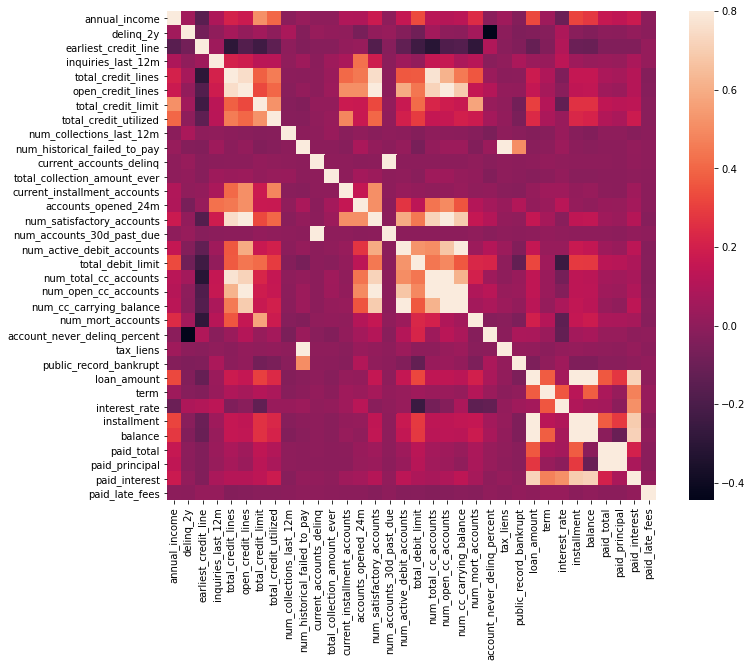

In [19]:
# heat map of correlation of features
correlation_matrix = new_df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()


In [92]:
import pandas as pd
corr_df= new_df[['annual_income', 'delinq_2y', 'total_credit_limit', 'loan_amount', 'term', 'interest_rate',
                       'installment', 'balance', 'paid_total', 'paid_principal', 
                       'paid_interest', 'paid_late_fees']]
corr_df

,annual_income,delinq_2y,total_credit_limit,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,90000.0,0,70795,28000,60,14.07,652.53,27015.86,1999.33,984.14,1015.19,0.0
1,40000.0,0,28800,5000,36,12.61,167.54,4651.37,499.12,348.63,150.49,0.0
2,40000.0,0,24193,2000,36,17.09,71.40,1824.63,281.80,175.37,106.43,0.0
3,30000.0,0,25400,21600,36,6.72,664.19,18853.26,3312.89,2746.74,566.15,0.0
4,35000.0,0,69839,23000,36,14.07,786.87,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,108000.0,0,199195,24000,36,7.35,744.90,21586.34,2969.80,2413.66,556.14,0.0
9996,121000.0,4,382061,10000,36,19.03,366.72,9147.44,1456.31,852.56,603.75,0.0
9997,67000.0,2,346402,30000,36,23.88,1175.10,27617.65,4620.80,2382.35,2238.45,0.0
9998,80000.0,0,294475,24000,36,5.32,722.76,21518.12,2873.31,2481.88,391.43,0.0


<AxesSubplot:>

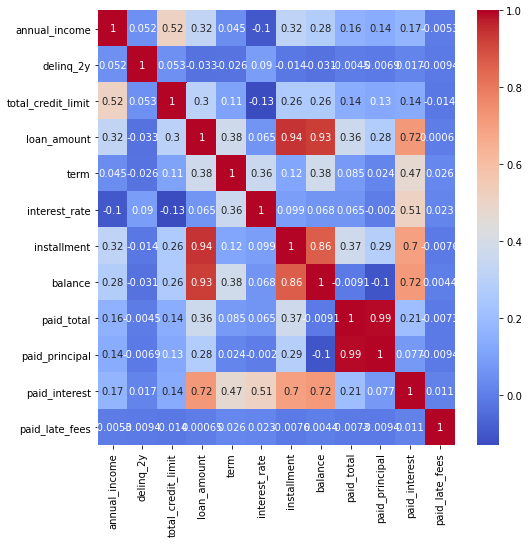

In [93]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_df.corr(),annot=True,cmap='coolwarm')

The correlation between every columns and itself is one. This is the maximum value of correlation.
the negative value means negative correlation.
The blues are negative correlation. The darker the blue stronger the correlation.
In Middle light colour there is not correlation at all.
The reds are positive correlation. The darker the red stronger the correlation.
In this example interest_rate and annual_income have the negative correlation.
paid_total and paid_pricipal having a strong positive correlation.
loan_amount and balance having a positive correlation.


#### 4.Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes. 

#### Checking for categorical data

C:\Users\sachn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

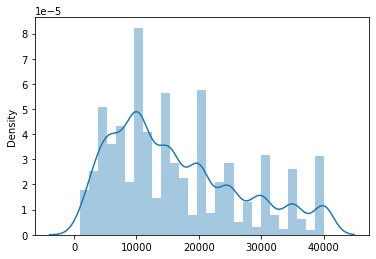

In [22]:
# distribution of Amount
amount = [new_df['loan_amount'].values]
sns.distplot(amount)


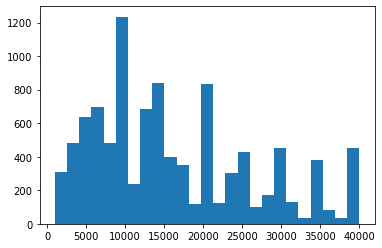

In [23]:
plt.hist(new_df['loan_amount'], bins=25)
plt.show()

The bin inputn arguments allows us to specify how many bins or bars you see in the plot. The total number of bins( bars)
is equal to the number that we assign to the bin input argument.
The bins represents the interval (the range of values specified at the bar)
so here i use bins =25 so loan_amount values distrbuted in 25 bars.

In [24]:
df = df.dropna(subset=['loan_amount'])

C:\Users\sachn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Loan Amounts Distribution')

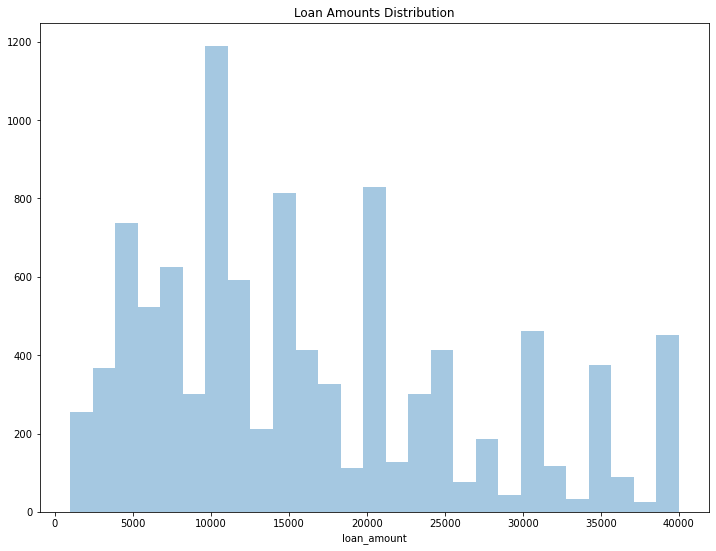

In [25]:
fig= plt.gcf()
fig.set_size_inches( 12, 9)
sns.distplot( a=new_df["loan_amount"], hist=True, kde=False, rug=False ).set_title("Loan Amounts Distribution")

#### 5.Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 
a.Is there a better way to do this than with a lambda? 
b.Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown. 

In [94]:
df["state"].unique()

array(['NJ', 'HI', 'WI', 'PA', 'CA', 'KY', 'MI', 'AZ', 'NV', 'IL', 'FL',
       'SC', 'CO', 'TN', 'TX', 'VA', 'NY', 'GA', 'MO', 'AR', 'MD', 'NC',
       'NE', 'WV', 'NH', 'UT', 'DE', 'MA', 'OR', 'OH', 'OK', 'SD', 'MN',
       'AL', 'WY', 'LA', 'IN', 'KS', 'MS', 'WA', 'ME', 'VT', 'CT', 'NM',
       'AK', 'MT', 'RI', 'ND', 'DC', 'ID'], dtype=object)

In [95]:
pacific_list =['AK', 'CA', 'HI', 'OR', 'WA']
pacific_list

plains_list =['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY']
plains_list

midwest_list =['IL', 'IN', 'MI', 'OH', 'WI','IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']
midwest_list

northeast_list =['CT', 'ME', 'MA', 'NH', 'RI','VT','NJ', 'NY', 'PA'] 
northeast_list

south_list =['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC','WV','AL', 'KY', 'MS','TN','AR', 'LA', 'OK', 'TX']
south_list

['DE',
 'FL',
 'GA',
 'MD',
 'NC',
 'SC',
 'VA',
 'DC',
 'WV',
 'AL',
 'KY',
 'MS',
 'TN',
 'AR',
 'LA',
 'OK',
 'TX']

In [96]:
#function to split state to region
func =(lambda x:"plain"if x in plains_list else("midwest" if x in midwest_list else("pacific" if x in pacific_list else("south"if x in south_list else "northeast"))))

df['region'] = list(map(func, df['state']))
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,region
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,Mar-18,Current,0,0,27015.86,1999.33,984.14,1015.19,0.0,northeast
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,Feb-18,Current,0,0,4651.37,499.12,348.63,150.49,0.0,pacific
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,Feb-18,Current,1,0,1824.63,281.80,175.37,106.43,0.0,midwest
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,Jan-18,Current,0,0,18853.26,3312.89,2746.74,566.15,0.0,northeast
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,Mar-18,Current,0,0,21430.15,2324.65,1569.85,754.80,0.0,pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,Jan-18,Current,0,0,21586.34,2969.80,2413.66,556.14,0.0,south
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,Feb-18,Current,0,0,9147.44,1456.31,852.56,603.75,0.0,northeast
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,Feb-18,Current,1,0,27617.65,4620.80,2382.35,2238.45,0.0,northeast
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,Feb-18,Current,0,0,21518.12,2873.31,2481.88,391.43,0.0,midwest


In [97]:
#without using lambda
def regions_of_state(state):
    regions = {'Northeast':['CT', 'ME', 'MA', 'NH', 'RI','VT','NJ', 'NY', 'PA'] ,
               'Midwest':['IL', 'IN', 'MI', 'OH', 'WI','IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD'],
               'South': ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC','WV','AL', 'KY', 'MS','TN','AR', 'LA', 'OK', 'TX'],
               'Plains': ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY'],
               'Pacific': ['AK', 'CA', 'HI', 'OR', 'WA']}
    if state in regions['Northeast']:
        return 'Northeast'
    if state in regions['Midwest']:
        return 'Midwest'
    if state in regions['South']:
        return 'South'
    if state in regions['Plains']:
        return 'Plains'
    else:
        return 'Pacific'
df['regions'] = df.state.map(regions_of_state)
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,region,regions
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,Current,0,0,27015.86,1999.33,984.14,1015.19,0.0,northeast,Northeast
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,Current,0,0,4651.37,499.12,348.63,150.49,0.0,pacific,Pacific
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,Current,1,0,1824.63,281.80,175.37,106.43,0.0,midwest,Midwest
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,Current,0,0,18853.26,3312.89,2746.74,566.15,0.0,northeast,Northeast
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,Current,0,0,21430.15,2324.65,1569.85,754.80,0.0,pacific,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,Current,0,0,21586.34,2969.80,2413.66,556.14,0.0,south,South
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,Current,0,0,9147.44,1456.31,852.56,603.75,0.0,northeast,Northeast
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,Current,1,0,27617.65,4620.80,2382.35,2238.45,0.0,northeast,Northeast
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,Current,0,0,21518.12,2873.31,2481.88,391.43,0.0,midwest,Midwest


#### 6.Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

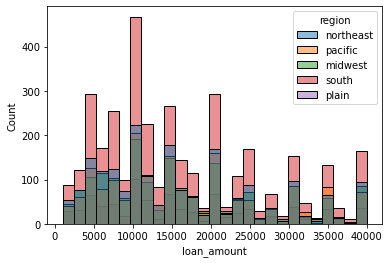

In [98]:
sns.histplot(x= "loan_amount", data=df, hue='region')
plt.show()

south and midwest having employees who having large loan_amount, northeast, pacific and plain having less loan_amount.